# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gzip
from pprint import pprint
import json


# Import API key
import config


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities_country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_country_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        cities_country_code.append(city_country_code)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
json_data = []
with gzip.open('./city.list.json.gz') as file:
    json_data = json.load(file)
#pprint(json_data)
list_of_cities_in_openweather = [json_data[i]['name'] for i in range(len(json_data))]
list_of_country_codes_in_openweather = [json_data[i]['country'] for i in range(len(json_data))]
cities_countries_in_openweather = [str(list_of_cities_in_openweather[i].lower() + ',' +
                                       list_of_country_codes_in_openweather[i].lower())
                                     for i in range(len(list_of_cities_in_openweather))]
cities_countries_ids = [json_data[i]['id'] for i in range(len(json_data))]
#cities_countries_ids

In [7]:
# suspecting that the list of cities' latitudes may not be that uniform... 
# oh well... should be good enough to prove the point though...

# To ensure the city is in the OpenWeather API, we need to search the list of cities provided:

url_oweathermap = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_url = f"{url_oweathermap}appid={config.api_key}&units={units}&q="
#print(f"{base_url})

cities_queried = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp= []
wind_speed = []

# Free version only allows 60 calls per minute; 
# let's break down the cities to be queried into sets of 50
# will call each set per minute, so it will take a total of math.ceil(len(cities) / 50) minutes
print("-----------------------------")
print("Beginning data Retrieval")
print("-----------------------------")    
num_of_queries = 0
max_queries = 50 # in reality we can do 60/min
current_set = 1
for city in cities:
    city_country_string = str(city.lower() + ',' + cities_country_code[cities.index(city)].lower())
    if city_country_string not in cities_countries_in_openweather:
        print('City not found. Skipping...')
        continue
    if(num_of_queries < max_queries):
        city_id = cities_countries_ids[cities_countries_in_openweather.index(city_country_string)]
        url = str(base_url + '&id=' + str(city_id))
        
        response = requests.get(url).json()
        if int(response['cod']) != 200: 
            raise Exception('Something went wrong.\nCode: ' + str(response['cod']) + '; ' + str(response['message']))
        num_of_queries += 1
        print(f" Processing Record {num_of_queries} of Set {current_set} | {city}")
        #print(f"{url}")
        cities_queried.append(city)
        cloudiness.append(int(response['clouds']['all']))
        country.append(str(response['sys']['country']))
        date.append(int(response['dt']))
        humidity.append(int(response['main']['humidity']))
        lat.append(float(response['coord']['lat']))
        lng.append(float(response['coord']['lon']))
        max_temp.append(float(response['main']['temp_max']))
        wind_speed.append(float(response['wind']['speed']))
    else:
        print('Waiting 30 seconds to retrieve the next set of 50 cities')
        time.sleep(30)
        num_of_queries = 0
        current_set += 1
print("-----------------------------")
print("Data Retrieval Done")
print("-----------------------------")

-----------------------------
Beginning data Retrieval
-----------------------------
 Processing Record 1 of Set 1 | karachi
 Processing Record 2 of Set 1 | te anau
 Processing Record 3 of Set 1 | adrar
 Processing Record 4 of Set 1 | grants
 Processing Record 5 of Set 1 | salalah
 Processing Record 6 of Set 1 | saint george
 Processing Record 7 of Set 1 | cuamba
 Processing Record 8 of Set 1 | ushuaia
 Processing Record 9 of Set 1 | ilulissat
 Processing Record 10 of Set 1 | punta arenas
 Processing Record 11 of Set 1 | new norfolk
 Processing Record 12 of Set 1 | kimbe
 Processing Record 13 of Set 1 | opuwo
 Processing Record 14 of Set 1 | yar-sale
 Processing Record 15 of Set 1 | souillac
 Processing Record 16 of Set 1 | saint-leu
 Processing Record 17 of Set 1 | bredasdorp
 Processing Record 18 of Set 1 | ostrovnoy
 Processing Record 19 of Set 1 | kapaa
 Processing Record 20 of Set 1 | butaritari
City not found. Skipping...
City not found. Skipping...
 Processing Record 21 of Set 1

 Processing Record 21 of Set 4 | danielskuil
 Processing Record 22 of Set 4 | katsuura
 Processing Record 23 of Set 4 | santa cruz do rio pardo
 Processing Record 24 of Set 4 | veraval
 Processing Record 25 of Set 4 | iqaluit
 Processing Record 26 of Set 4 | caravelas
 Processing Record 27 of Set 4 | nalut
 Processing Record 28 of Set 4 | vestmannaeyjar
 Processing Record 29 of Set 4 | anupgarh
City not found. Skipping...
 Processing Record 30 of Set 4 | pangai
 Processing Record 31 of Set 4 | katherine
 Processing Record 32 of Set 4 | cockburn town
 Processing Record 33 of Set 4 | chemodanovka
City not found. Skipping...
 Processing Record 34 of Set 4 | baia de aries
 Processing Record 35 of Set 4 | georgiyevka
 Processing Record 36 of Set 4 | thompson
 Processing Record 37 of Set 4 | cherskiy
 Processing Record 38 of Set 4 | hamilton
 Processing Record 39 of Set 4 | touros
 Processing Record 40 of Set 4 | severo-kurilsk
 Processing Record 41 of Set 4 | nyurba
 Processing Record 42 of

 Processing Record 41 of Set 7 | palaikastron
 Processing Record 42 of Set 7 | saint-joseph
 Processing Record 43 of Set 7 | luancheng
 Processing Record 44 of Set 7 | whitehorse
 Processing Record 45 of Set 7 | saltpond
 Processing Record 46 of Set 7 | port lincoln
 Processing Record 47 of Set 7 | develi
 Processing Record 48 of Set 7 | paray-le-monial
 Processing Record 49 of Set 7 | mabaruma
 Processing Record 50 of Set 7 | babu
Waiting 30 seconds to retrieve the next set of 50 cities
 Processing Record 1 of Set 8 | tiksi
 Processing Record 2 of Set 8 | nago
 Processing Record 3 of Set 8 | araouane
 Processing Record 4 of Set 8 | dwarka
 Processing Record 5 of Set 8 | taltal
 Processing Record 6 of Set 8 | marang
City not found. Skipping...
 Processing Record 7 of Set 8 | bilibino
 Processing Record 8 of Set 8 | huambo
 Processing Record 9 of Set 8 | gorele
 Processing Record 10 of Set 8 | fairbanks
 Processing Record 11 of Set 8 | freeport
 Processing Record 12 of Set 8 | puerto le

 Processing Record 11 of Set 11 | benghazi
 Processing Record 12 of Set 11 | jatai
 Processing Record 13 of Set 11 | saint-pierre
 Processing Record 14 of Set 11 | aklavik
 Processing Record 15 of Set 11 | dublin
 Processing Record 16 of Set 11 | kabanjahe
 Processing Record 17 of Set 11 | hinton
 Processing Record 18 of Set 11 | usak
 Processing Record 19 of Set 11 | beyneu
 Processing Record 20 of Set 11 | jurm
City not found. Skipping...
 Processing Record 21 of Set 11 | port moresby
 Processing Record 22 of Set 11 | sinnamary
 Processing Record 23 of Set 11 | saldanha
 Processing Record 24 of Set 11 | grand gaube
 Processing Record 25 of Set 11 | erzin
 Processing Record 26 of Set 11 | yatou
 Processing Record 27 of Set 11 | aykino
 Processing Record 28 of Set 11 | garissa
 Processing Record 29 of Set 11 | aykhal
 Processing Record 30 of Set 11 | anadyr
 Processing Record 31 of Set 11 | crateus
 Processing Record 32 of Set 11 | mallasamudram
 Processing Record 33 of Set 11 | puerto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
results_df = pd.DataFrame({'City': cities_queried,
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date': date,
                          'Humidity': humidity,
                          'Lat': lat,
                          'Lng': lng,
                          'Max Temp': max_temp,
                          'Wind Speed': wind_speed})
results_df.to_csv(output_data_file, index=False, encoding='utf-8')

In [9]:
print(results_df.count())

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64


In [10]:
results_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,karachi,0,PK,1552103700,56,24.91,67.08,69.80,11.41
1,te anau,100,NZ,1552106388,59,-45.42,167.72,63.29,3.40
2,adrar,88,DZ,1552104000,12,27.87,-0.29,68.00,23.04
3,grants,75,US,1552103700,34,35.15,-107.85,32.00,17.22
4,salalah,0,OM,1552103400,14,17.02,54.09,78.80,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

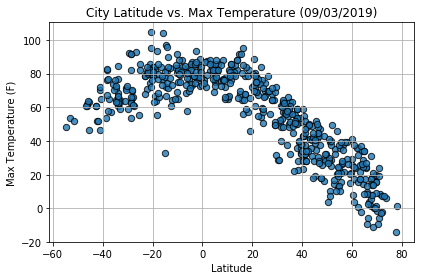

In [11]:
results_df.plot('Lat','Max Temp', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

dates = results_df['Date']
unique_date = list(set([time.gmtime(dates[i]) for i in range(len(dates))]))[0]
unique_date = time.strftime('%d/%m/%Y', unique_date)

plt.title('City Latitude vs. Max Temperature (' + unique_date +')')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_maxTemp.png', bbox_inches='tight')
plt.show()

#### Latitude vs. Humidity Plot

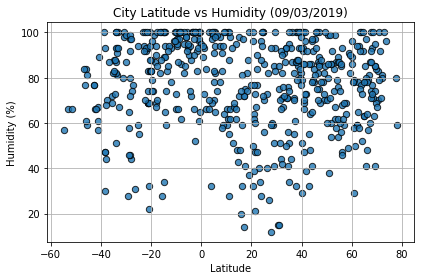

In [12]:
results_df.plot('Lat', 'Humidity', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.title('City Latitude vs Humidity (' + unique_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_humidity.png', bbox_inches='tight')
plt.show()

#### Latitude vs. Cloudiness Plot

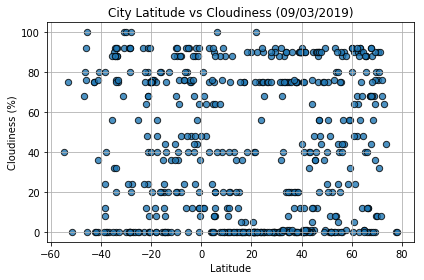

In [13]:
results_df.plot('Lat', 'Cloudiness', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.title('City Latitude vs Cloudiness (' + unique_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_cloudiness.png', bbox_inches='tight')
plt.show()

#### Latitude vs. Wind Speed Plot

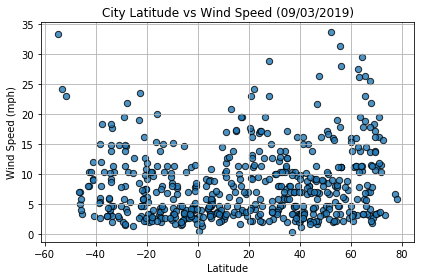

In [14]:
results_df.plot('Lat', 'Wind Speed', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.title('City Latitude vs Wind Speed (' + unique_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_windSpeed.png', bbox_inches='tight')
plt.show()

In [ ]:
# Three observable trends based on the data.

# 1. It certainly does get hotter as one approaches zero latitude
# 2. Cities in the -20 to +20 latitudes had temperatures just as hot as the equator (~80 degrees Fahrenheit)
# 3. As expected, the southern hemisphere is hotter in the Winter than the northern hemisphere